Step 1: Data_Loading_&_Initial_Inspection.

1.1 Import_Libraries.

In [146]:
import pandas as pd
import chardet
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [6]:
with open(r"C:\Users\PAUNESH\Downloads\archive (3)\DataCoSupplyChainDataset.csv",'rb') as f:
    result = chardet.detect(f.read(10000))
print(result['encoding'])

ISO-8859-1


1.2 Load_Data

In [7]:
data=pd.read_csv(
    r"C:\Users\PAUNESH\Downloads\archive (3)\DataCoSupplyChainDataset.csv",
    encoding='latin-1'
)

1.3 Initial_Checks

In [14]:
# View_Columns_&_Data_Types.
print(data.columns.tolist())
print(data.info())

['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status', 'shipping date (DateOrde

In [19]:
# Sample_Datta
data.head(4)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class


In [20]:
# Summary_Statistics.
data.describe(include='all')

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
count,180519,180519.000000,180519.000000,180519.000000,180519.000000,180519,180519.000000,180519.000000,180519,180519,...,24840.000000,180519.000000,180519.000000,0.0,180519,180519,180519.000000,180519.0,180519,180519
unique,4,NaN,NaN,NaN,NaN,4,NaN,NaN,50,563,...,NaN,NaN,NaN,NaN,118,118,NaN,NaN,63701,4
top,DEBIT,NaN,NaN,NaN,NaN,Late delivery,NaN,NaN,Cleats,Caguas,...,NaN,NaN,NaN,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,NaN,NaN,1/5/2016 5:58,Standard Class
freq,69295,NaN,NaN,NaN,NaN,98977,NaN,NaN,24551,66770,...,NaN,NaN,NaN,NaN,24515,24515,NaN,NaN,10,107752
mean,NaN,3.497654,2.931847,21.974989,183.107609,NaN,0.548291,31.851451,NaN,NaN,...,55426.132327,692.509764,31.851451,NaN,NaN,NaN,141.232550,0.0,NaN,NaN
std,NaN,1.623722,1.374449,104.433526,120.043670,NaN,0.497664,15.640064,NaN,NaN,...,31919.279101,336.446807,15.640064,NaN,NaN,NaN,139.732492,0.0,NaN,NaN
min,NaN,0.000000,0.000000,-4274.979980,7.490000,NaN,0.000000,2.000000,NaN,NaN,...,1040.000000,19.000000,2.000000,NaN,NaN,NaN,9.990000,0.0,NaN,NaN
25%,NaN,2.000000,2.000000,7.000000,104.379997,NaN,0.000000,18.000000,NaN,NaN,...,23464.000000,403.000000,18.000000,NaN,NaN,NaN,50.000000,0.0,NaN,NaN
50%,NaN,3.000000,4.000000,31.520000,163.990005,NaN,1.000000,29.000000,NaN,NaN,...,59405.000000,627.000000,29.000000,NaN,NaN,NaN,59.990002,0.0,NaN,NaN
75%,NaN,5.000000,4.000000,64.800003,247.399994,NaN,1.000000,45.000000,NaN,NaN,...,90008.000000,1004.000000,45.000000,NaN,NaN,NaN,199.990005,0.0,NaN,NaN


Step 2: Data_Cleaning_&_Preprocessing.

2.1 Remove_Sensitive_Columns_&_Unwanted_Columns.

In [24]:
nessessary_columns=['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk', 'order date (DateOrders)', 'Order Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Price', 'shipping date (DateOrders)', 'Shipping Mode']

In [26]:
def drop_columns(data, columns_to_drop):
    data=data.drop(columns=columns_to_drop)
    print(f"Droped {len(columns_to_drop)} Columns. Remaining: {len(data.columns)}")
    return data

In [27]:
columns_to_drop = [col for col in data.columns if col not in nessessary_columns]
data=drop_columns(data,columns_to_drop)

Droped 34 Columns. Remaining: 19


2.2 Handling_Missing_values

In [29]:
data.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Late_delivery_risk               0
order date (DateOrders)          0
Order Id                         0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Product Price                    0
shipping date (DateOrders)       0
Shipping Mode                    0
dtype: int64

2.3 Feature_Engineering

In [32]:
# Calculate_Delay_Duration
data['delay_duration']=data['Days for shipping (real)']-data['Days for shipment (scheduled)']

In [37]:
data['delay_duration']

0        -1
1         1
2         0
3        -1
4        -2
         ..
180514    0
180515    1
180516    1
180517   -1
180518    0
Name: delay_duration, Length: 180519, dtype: int64

In [83]:
# Time Based Features:
data['order_month']=pd.to_datetime(data['order date (DateOrders)']).dt.month
data['shipping_month']=pd.to_datetime(data['shipping date (DateOrders)']).dt.month

2.4 Drop_Duplicates.

In [43]:
data=data.drop_duplicates()

Step 3: Exploratory_Data_Analysiss(EDA)

3.1 Univariate_Analysis

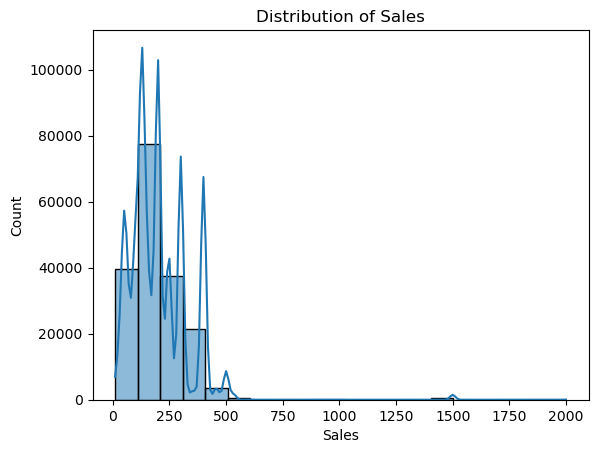

In [60]:
# Sales Distribution (Numeric_Columns)
sns.histplot(data['Sales'],kde=True,bins=20)
plt.title("Distribution of Sales")
plt.show()

3.2 Key_Visualization

Text(0.5, 1.0, 'Distribution of late Delivery Risk')

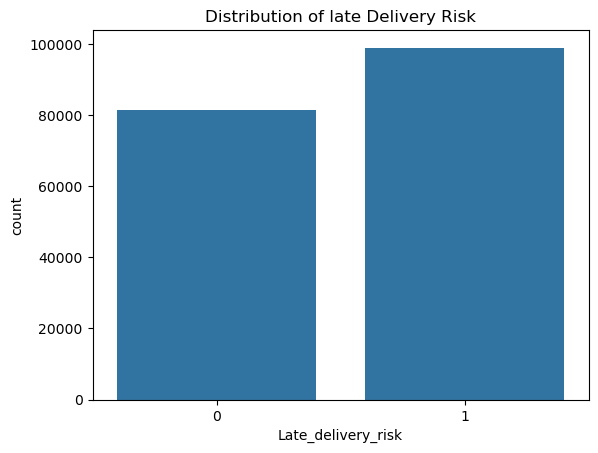

In [55]:
#Late_Delivery_Risk_Distribution.
sns.countplot(x='Late_delivery_risk',data=data)
plt.title('Distribution of late Delivery Risk')

<Axes: xlabel='Days for shipment (scheduled)', ylabel='Days for shipping (real)'>

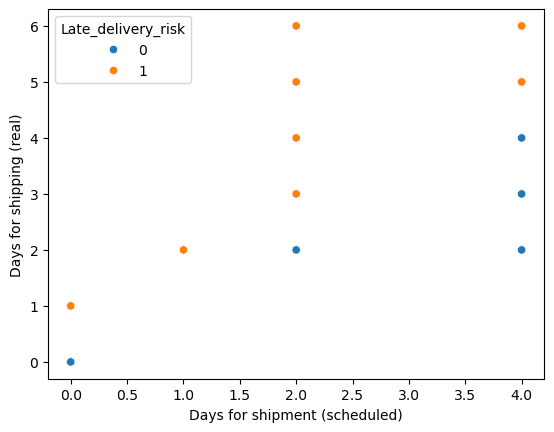

In [58]:
# Actual vs Scheduled Shippinng Days
sns.scatterplot(x='Days for shipment (scheduled)',y='Days for shipping (real)',hue='Late_delivery_risk',data=data)

<Axes: xlabel='Shipping Mode', ylabel='Late_delivery_risk'>

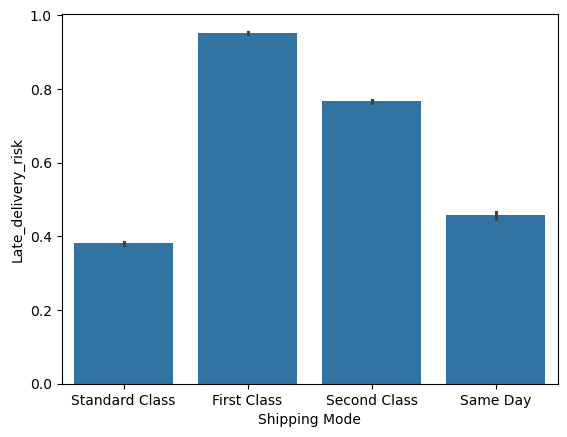

In [59]:
#Shipping_Mode_Impact
sns.barplot(x='Shipping Mode', y='Late_delivery_risk', data=data)

3.3 Sales & Profitability

In [67]:
# Calculate IQR to Identify Outliers
Q1=data['Benefit per order'].quantile(0.25)
Q3=data['Benefit per order'].quantile(0.75)
IQR = Q3 - Q1

In [71]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=data[(data['Benefit per order']< lower_bound)|(data['Benefit per order']>upper_bound)]
# Remove Outliers
data=data[(data['Benefit per order']>= lower_bound) & (data['Benefit per order']<=upper_bound)]

<Axes: xlabel='Shipping Mode', ylabel='Benefit per order'>

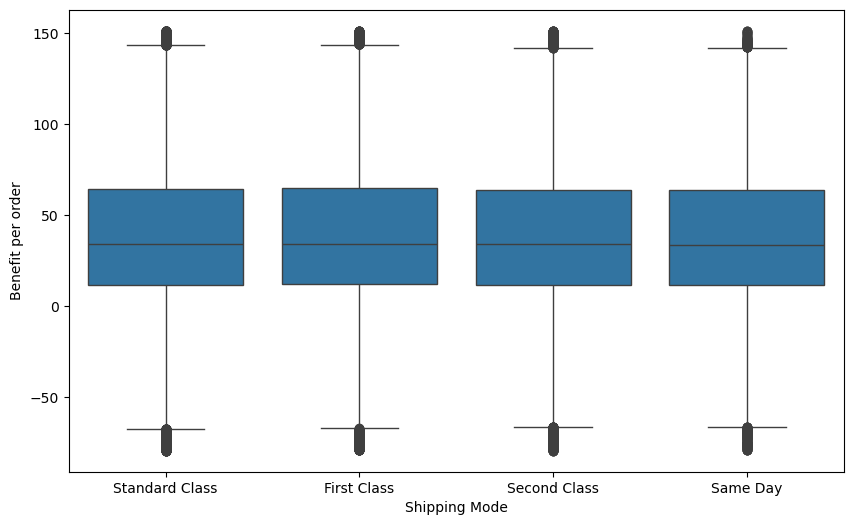

In [73]:
# Benefit per Order by Shipping Mode.
plt.figure(figsize=(10,6))
sns.boxplot(x='Shipping Mode',y='Benefit per order', data=data)

3.4 Discount Analysis

<Axes: xlabel='Order Item Discount Rate', ylabel='Order Item Quantity'>

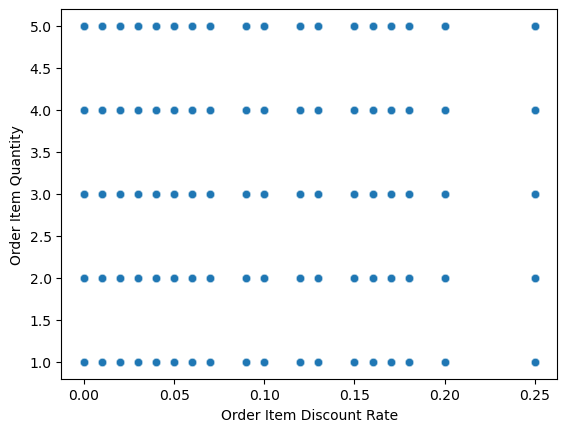

In [77]:
# Discount Rate vs Order Quantity
sns.scatterplot(x='Order Item Discount Rate', y='Order Item Quantity',data=data,alpha=0.5)

<Axes: xlabel='Order Item Discount', ylabel='Order Profit Per Order'>

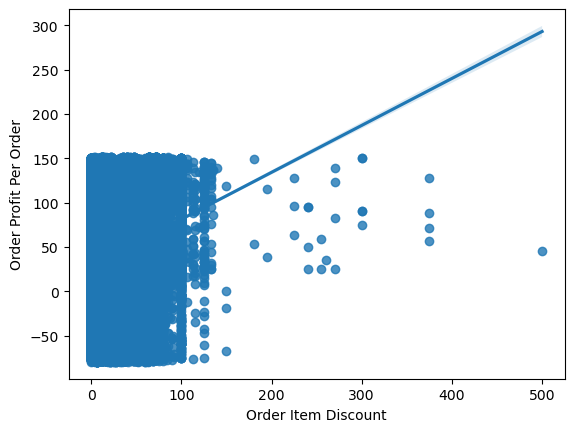

In [79]:
# Discount Impact on Profit
sns.regplot(x='Order Item Discount',y='Order Profit Per Order',data=data)

Step 4: Advanced Analysis

[A] Predictive Modeling (Late Delivery Risk)

In [115]:
data['order date']=pd.to_datetime(data['order date (DateOrders)'],errors='coerce')

In [117]:
data.drop(columns=(['order date (DateOrders)']),inplace=True)

In [121]:
data['year']=data['order date'].dt.year
data['month']=data['order date'].dt.month
data['day']=data['order date'].dt.day
data['hour']=data['order date'].dt.hour

data['year_1']=data['shipping date'].dt.year
data['month_1']=data['shipping date'].dt.month
data['day_1']=data['shipping date'].dt.day
data['hour_1']=data['shipping date'].dt.hour

In [122]:
data.drop(columns=['shipping date','order date'],inplace=True)

In [143]:
# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
data_encoded = pd.get_dummies(data, columns=['Shipping Mode','Type'])
X= data_encoded.drop(columns=['Late_delivery_risk','Order Id'])
Y= data_encoded['Late_delivery_risk']
# Ensure target variable is numerical
if Y.dtype=='Object':
    Y=LabelEncoder().fit_transform(Y)
#handling Missing values
X=X.fillna(0)
x1=X.astype(float)    
# Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x1,Y, test_size=0.2, random_state=42)
# Train Model
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [151]:
from sklearn.cluster import KMeans
x_cluster = data[['Sales per customer','Order Item Quantity']]
kmeans = KMeans(n_clusters=3)
data['cluster']=kmeans.fit_predict(x_cluster)

Step 5: Requerment Questions

A)..DeliveryPerformance

1. % Of with Late Delivery Risk

In [156]:
# Calculate the percentage using:
late_percent = (data['Late_delivery_risk'].sum()/len(data))*100
print(f"{late_percent:.2f} % of orders have late delivery risk.")

54.80 % of orders have late delivery risk.


2. Impact of shipping mode on timelines & profitability.

Text(0.5, 1.0, 'Average Delay Duration by Shipping Mode')

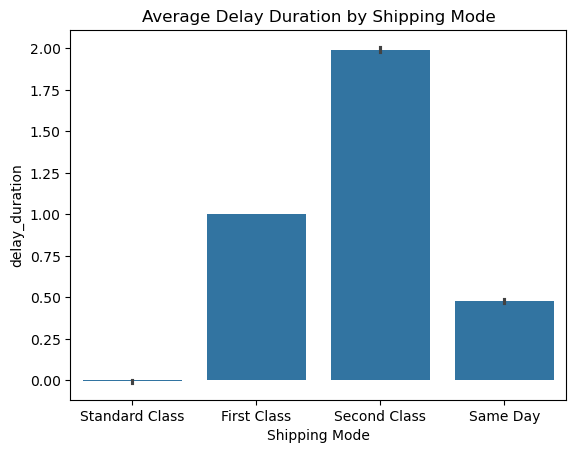

In [157]:
# Timelines
sns.barplot(x='Shipping Mode', y='delay_duration',data=data)
plt.title("Average Delay Duration by Shipping Mode")

Text(0.5, 1.0, 'Average Profit per order by Shipping Mode')

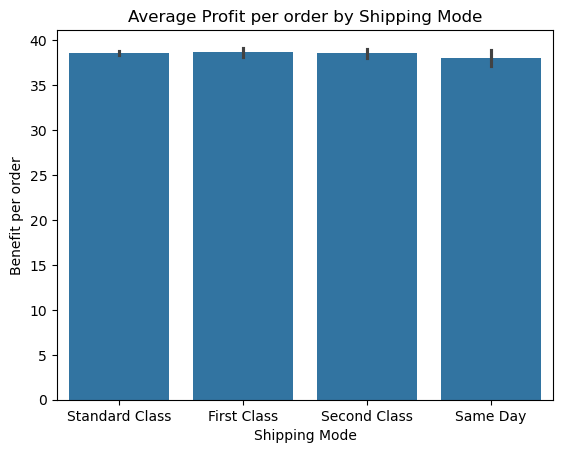

In [158]:
# Profitability
sns.barplot(x='Shipping Mode', y='Benefit per order',data=data)
plt.title("Average Profit per order by Shipping Mode")

3. Scheduled Days vs Delay Risk

<Axes: xlabel='Late_delivery_risk', ylabel='Days for shipment (scheduled)'>

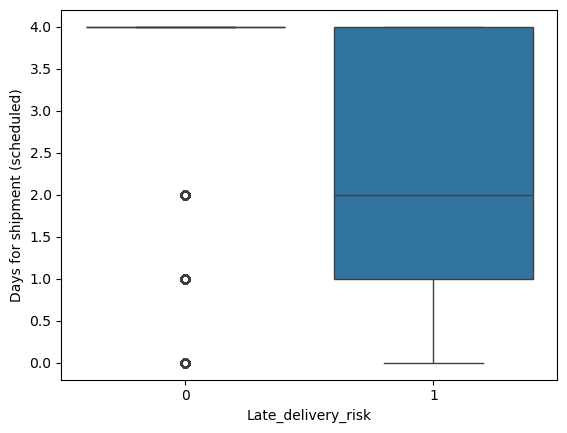

In [161]:
# Calculate correlation or compare averages:
sns.boxplot(x='Late_delivery_risk',y='Days for shipment (scheduled)',data=data)

B). Sales & Profitability

1. Most Profitable Shipping Mode

In [166]:
data.groupby('Shipping Mode')['Benefit per order'].mean().sort_values(ascending=False)

Shipping Mode
First Class       38.676590
Standard Class    38.604032
Second Class      38.575357
Same Day          38.035304
Name: Benefit per order, dtype: float64

2. Discount Rate vs. Order Quantity.

In [167]:
corr=data['Order Item Discount Rate'].corr(data['Order Item Quantity'])
print(f'Correlation:{corr:2f}')

Correlation:-0.004487


3. Seasonal Sales Trend

<Axes: xlabel='order_month', ylabel='Sales'>

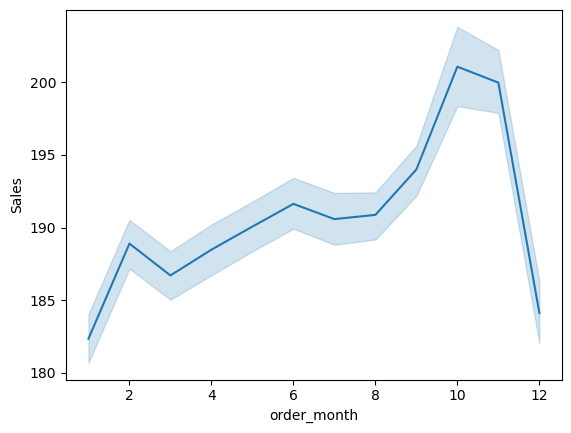

In [172]:
# Aggregate Sales By Month.
Monthly_sales=data.groupby('order_month')['Sales'].sum().reset_index()
sns.lineplot(x='order_month',y='Sales', data=data)

C. Operational Efficiency

1. Correlation: Delay Duration vs. Late Delivery Risk:

In [174]:
corr= data['delay_duration'].corr(data['Late_delivery_risk'])
print(f"Correlation: {corr: 2f}")

Correlation:  0.777867


2. Profit Ratio vs. Product Price

Text(0.5, 1.0, 'Profit Ratio vs. Product Price')

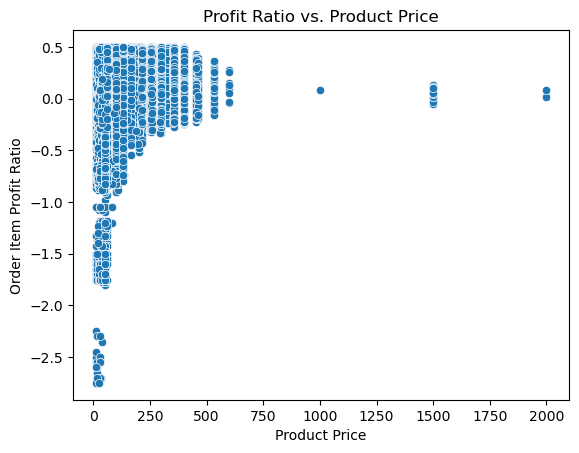

In [175]:
# Scatter plot and cooelation.
sns.scatterplot(x='Product Price',y='Order Item Profit Ratio', data=data)
plt.title("Profit Ratio vs. Product Price")

In [177]:
data.to_csv("processed_data.csv",index=False)